# 分類問題
## 實戰-Breast Cancer 良性惡性乳癌分類
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 載入數據集
data = load_breast_cancer(as_frame=True)
X, y = data.data, data.target

# 特徵標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 切訓練及測試資料
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 建立模型
model_keras = Sequential()
model_keras.add(Dense(8, activation='relu', input_shape=(X_train.shape[1],)))
model_keras.add(Dense(8, activation='relu'))
model_keras.add(Dense(1, activation='sigmoid'))

# 編譯模型
model_keras.compile(optimizer='adam',
          loss='binary_crossentropy',
          metrics=['accuracy'])

# 訓練資料資訊保存
history = model_keras.fit(X_train, y_train, epochs=10, batch_size=8, validation_split=0.1)

Epoch 1/10
52/52 [==============================] - 7s 19ms/step - loss: 0.6521 - accuracy: 0.6015 - val_loss: 0.4903 - val_accuracy: 0.6957
Epoch 2/10
52/52 [==============================] - 1s 11ms/step - loss: 0.4735 - accuracy: 0.7677 - val_loss: 0.3619 - val_accuracy: 0.8696
Epoch 3/10
52/52 [==============================] - 0s 7ms/step - loss: 0.3448 - accuracy: 0.8973 - val_loss: 0.2652 - val_accuracy: 0.9130
Epoch 4/10
52/52 [==============================] - 1s 9ms/step - loss: 0.2510 - accuracy: 0.9413 - val_loss: 0.2042 - val_accuracy: 0.9565
Epoch 5/10
52/52 [==============================] - 0s 8ms/step - loss: 0.1906 - accuracy: 0.9535 - val_loss: 0.1692 - val_accuracy: 0.9565
Epoch 6/10
52/52 [==============================] - 1s 12ms/step - loss: 0.1555 - accuracy: 0.9609 - val_loss: 0.1468 - val_accuracy: 0.9565
Epoch 7/10
52/52 [==============================] - 1s 10ms/step - loss: 0.1336 - accuracy: 0.9658 - val_loss: 0.1322 - val_accuracy: 0.9565
Epoch 8/10
52/52

In [ ]:
from sklearn.metrics import roc_auc_score
# 測試資料準確率
loss, accuracy = model_keras.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

# 測試資料AUC
y_pred_proba = model_keras.predict(X_test).ravel()
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'Test AUC: {auc_score:.4f}')

Test Accuracy: 0.9649
4/4 [==============================] - 0s 3ms/step
Test AUC: 0.9974


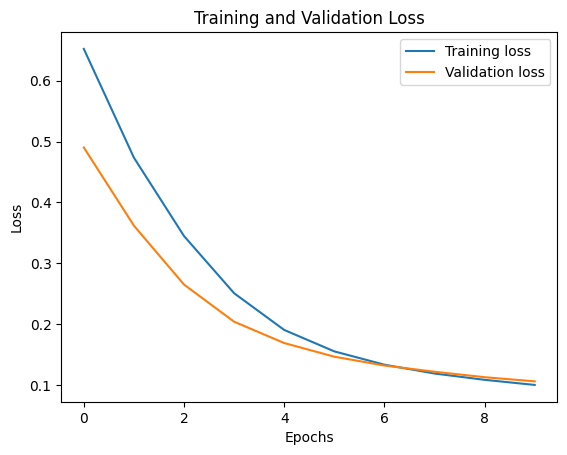

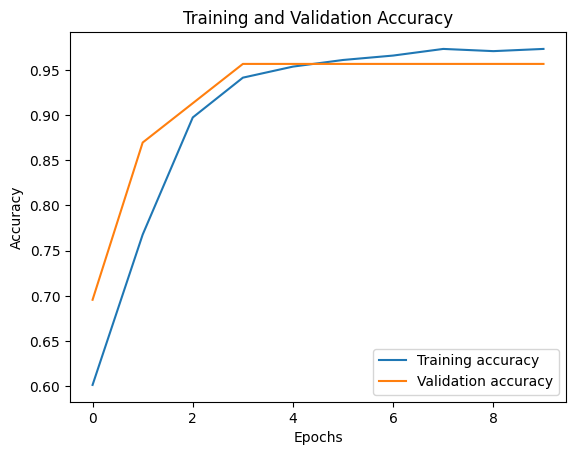

In [ ]:
import matplotlib.pyplot as plt

# 損失曲線
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 準確率曲線
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 提升模型準確率策略
* 調整激活函數、損失函數、優化器
* 增加訓練次數epochs，earlystopping
* 使用正則化，如Dropout
* 增加資料前處理
* 增加神經網路深度及神經元數
* 超參數調整

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

# 建立模型
model_keras = Sequential()
model_keras.add(Dense(8, activation='relu', input_shape=(X_train.shape[1],)))
model_keras.add(Dropout(0.5))
model_keras.add(Dense(8, activation='relu'))
model_keras.add(Dropout(0.5))
model_keras.add(Dense(1, activation='sigmoid'))

# 編譯模型
model_keras.compile(optimizer='adam',
          loss='binary_crossentropy',
          metrics=['accuracy'])

# 訓練資料資訊保存
history = model_keras.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.1, callbacks=[EarlyStopping()])

Epoch 1/100
52/52 [==============================] - 2s 7ms/step - loss: 0.8366 - accuracy: 0.5086 - val_loss: 0.7439 - val_accuracy: 0.4130
Epoch 2/100
52/52 [==============================] - 0s 4ms/step - loss: 0.7035 - accuracy: 0.5868 - val_loss: 0.6373 - val_accuracy: 0.6304
Epoch 3/100
52/52 [==============================] - 0s 4ms/step - loss: 0.6644 - accuracy: 0.6357 - val_loss: 0.5671 - val_accuracy: 0.8696
Epoch 4/100
52/52 [==============================] - 0s 4ms/step - loss: 0.5982 - accuracy: 0.6944 - val_loss: 0.5225 - val_accuracy: 0.8913
Epoch 5/100
52/52 [==============================] - 0s 4ms/step - loss: 0.5730 - accuracy: 0.7555 - val_loss: 0.4865 - val_accuracy: 0.8913
Epoch 6/100
52/52 [==============================] - 0s 4ms/step - loss: 0.5403 - accuracy: 0.7677 - val_loss: 0.4445 - val_accuracy: 0.9130
Epoch 7/100
52/52 [==============================] - 0s 5ms/step - loss: 0.4871 - accuracy: 0.8386 - val_loss: 0.4060 - val_accuracy: 0.9130
Epoch 8/100
5

In [ ]:
from sklearn.metrics import roc_auc_score
# 測試資料準確率
loss, accuracy = model_keras.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

# 測試資料AUC
y_pred_proba = model_keras.predict(X_test).ravel()
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'Test AUC: {auc_score:.4f}')

Test Accuracy: 0.9825
4/4 [==============================] - 0s 4ms/step
Test AUC: 0.9977


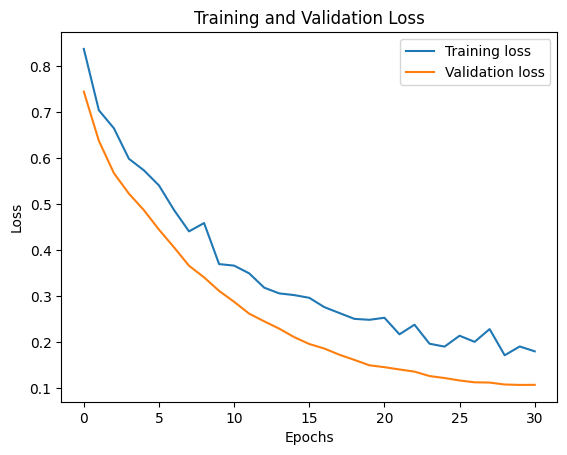

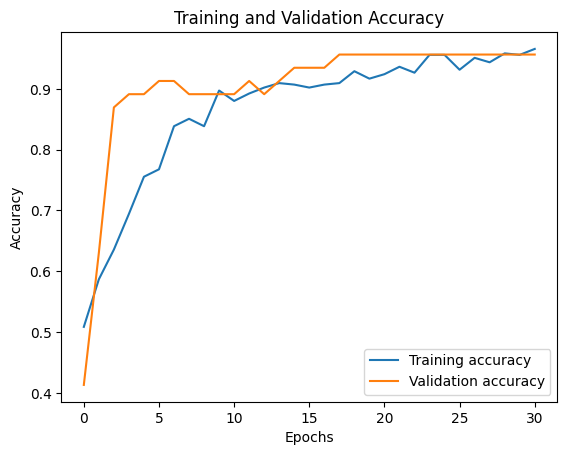

In [ ]:
import matplotlib.pyplot as plt

# 損失曲線
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 準確率曲線
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Pytorch 版本

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import roc_auc_score

# 建立模型
class torchBCM(nn.Module):
    def __init__(self, input_shape):
        super(torchBCM, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(input_shape, 8),
            nn.ReLU(),
            nn.Dropout(0.5)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(8, 8),
            nn.ReLU(),
            nn.Dropout(0.5)
        )
        self.output = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.output(x)
        return self.sigmoid(x)

model = torchBCM(input_shape=X_train.shape[1])

# 設定損失函數及優化器
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

# 將資料轉為張量
tensor_x_train = torch.Tensor(X_train)
tensor_y_train = torch.Tensor(y_train.values).unsqueeze(1)  # 要增加一個維度，二元問題中pytorch獨有
tensor_x_test = torch.Tensor(X_test)
tensor_y_test = torch.Tensor(y_test.values).unsqueeze(1)

train_dataset = TensorDataset(tensor_x_train, tensor_y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# 模型訓練
model.train()
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        # 前向傳播
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)

        # 反向傳播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 評估測試資料
model.eval()
with torch.no_grad():
    inputs = tensor_x_test
    outputs = model(inputs).cpu()
    predicted = (outputs > 0.5).float()
    accuracy = (predicted.eq(tensor_y_test).sum() / float(tensor_y_test.shape[0])).item()
    print(f'Test Accuracy: {accuracy:.4f}')

    auc_score = roc_auc_score(y_test, outputs.numpy())
    print(f'Test AUC: {auc_score:.4f}')


Epoch [10/100], Loss: 0.6088
Epoch [20/100], Loss: 0.6201
Epoch [30/100], Loss: 0.3057
Epoch [40/100], Loss: 0.2314
Epoch [50/100], Loss: 0.4306
Epoch [60/100], Loss: 0.3839
Epoch [70/100], Loss: 0.3557
Epoch [80/100], Loss: 0.2981
Epoch [90/100], Loss: 0.2833
Epoch [100/100], Loss: 0.2837
Test Accuracy: 0.9737
Test AUC: 0.9980


# 數值問題
## 實戰-California Housing 加州房價預測
https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 載入數據
housing = fetch_california_housing(as_frame=True)
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X, y = housing.data, housing.target

# 特徵標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 切訓練及測試資料
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

# 建立模型
model_keras = Sequential()
model_keras.add(Dense(8, activation='relu', input_shape=(X_train.shape[1],)))
model_keras.add(Dropout(0.5))
model_keras.add(Dense(8, activation='relu'))
model_keras.add(Dropout(0.5))
model_keras.add(Dense(1))

# 編譯模型
model_keras.compile(optimizer='RMSprop',
          loss='mean_squared_error',
          metrics=['mean_squared_error'])

# 訓練模型並保存歷史記錄
history = model_keras.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.1, callbacks=[EarlyStopping()])

Epoch 1/100
1858/1858 [==============================] - 9s 4ms/step - loss: 2.4704 - mean_squared_error: 2.4704 - val_loss: 0.8601 - val_mean_squared_error: 0.8601
Epoch 2/100
1858/1858 [==============================] - 8s 4ms/step - loss: 1.1788 - mean_squared_error: 1.1788 - val_loss: 0.7249 - val_mean_squared_error: 0.7249
Epoch 3/100
1858/1858 [==============================] - 8s 4ms/step - loss: 0.9991 - mean_squared_error: 0.9991 - val_loss: 0.6844 - val_mean_squared_error: 0.6844
Epoch 4/100
1858/1858 [==============================] - 7s 4ms/step - loss: 1.1660 - mean_squared_error: 1.1660 - val_loss: 0.6121 - val_mean_squared_error: 0.6121
Epoch 5/100
1858/1858 [==============================] - 8s 4ms/step - loss: 1.1220 - mean_squared_error: 1.1220 - val_loss: 0.5932 - val_mean_squared_error: 0.5932
Epoch 6/100
1858/1858 [==============================] - 6s 3ms/step - loss: 1.5883 - mean_squared_error: 1.5883 - val_loss: 0.5773 - val_mean_squared_error: 0.5773
Epoch 7/10

In [ ]:
# 評估模型
mse_test = model_keras.evaluate(X_test, y_test)
print(f'Test MSE: {mse_test[0]:.4f}')

129/129 [==============================] - 0s 2ms/step - loss: 0.5529 - mean_squared_error: 0.5529
Test MSE: 0.5529


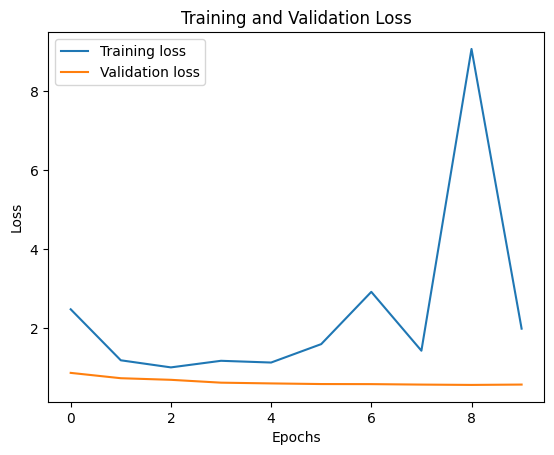

In [ ]:
import matplotlib.pyplot as plt

# 損失曲線
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# LGBM模型比較

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

lgb_train = lgb.Dataset(X_train, y_train)

# 模型參數
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression', #數值預測
    'metric': {'mse'},
    'num_leaves': 8, #葉子最大數量，複雜程度
    'learning_rate': 0.01 #
}

# 訓練模型
gbm = lgb.train(params,
          lgb_train,
          num_boost_round=100 #樹的數量
          )


# 預測
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
mse_test = mean_squared_error(y_test, y_pred)
print(f'The mean squared error (MSE) on test set: {mse_test}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947
The mean squared error (MSE) on test set: 0.6432144269008113


In [ ]:
model_keras.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 153 (612.00 Byte)
Trainable params: 153 (612.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Pytorch版本

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# 建立模型
class torchLIN(nn.Module):
    def __init__(self, input_dim):
        super(torchLIN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(input_dim, 8),
            nn.ReLU(),
            nn.Dropout(0.5)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(8, 8),
            nn.ReLU(),
            nn.Dropout(0.5)
        )
        self.output = nn.Linear(8, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.output(x)
        return x

# 數據轉為張量
tensor_x_train = torch.Tensor(X_train)
tensor_y_train = torch.Tensor(y_train.values)
tensor_x_test = torch.Tensor(X_test)
tensor_y_test = torch.Tensor(y_test.values)

tensor_train = TensorDataset(tensor_x_train, tensor_y_train)
tensor_test = TensorDataset(tensor_x_test, tensor_y_test)

# 建立訓練及測試資料集
train_loader = DataLoader(dataset=tensor_train, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=tensor_test, batch_size=32, shuffle=False)

# 輸入模型
model = torchLIN(input_dim=X_train.shape[1])

# 定義優化器及損失函數
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

# 訓練模型
n_epochs = 30

for epoch in range(n_epochs):
    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}: Loss: {loss.item():.4f}')

# 測試模型
model.eval()
test_loss = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += loss_fn(output, target).item()

test_loss /= len(test_loader.dataset)
print(f'Test MSE: {test_loss:.4f}')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1: Loss: 1.0344
Epoch 2: Loss: 1.1611
Epoch 3: Loss: 1.2398
Epoch 4: Loss: 1.2302
Epoch 5: Loss: 2.2848
Epoch 6: Loss: 1.0602
Epoch 7: Loss: 1.6645
Epoch 8: Loss: 1.5604
Epoch 9: Loss: 1.1341
Epoch 10: Loss: 1.5401
Epoch 11: Loss: 2.3185
Epoch 12: Loss: 1.2243
Epoch 13: Loss: 1.0968
Epoch 14: Loss: 1.2352
Epoch 15: Loss: 2.1482
Epoch 16: Loss: 1.9675
Epoch 17: Loss: 0.8258
Epoch 18: Loss: 1.5289
Epoch 19: Loss: 1.8937
Epoch 20: Loss: 0.5919
Epoch 21: Loss: 0.9503
Epoch 22: Loss: 1.3664
Epoch 23: Loss: 1.4514
Epoch 24: Loss: 1.5597
Epoch 25: Loss: 1.0016
Epoch 26: Loss: 1.0280
Epoch 27: Loss: 1.1859
Epoch 28: Loss: 1.3627
Epoch 29: Loss: 1.4974
Epoch 30: Loss: 1.3496
Test MSE: 0.0409
